<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kategorie-MINT" data-toc-modified-id="Kategorie-MINT-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kategorie MINT</a></span><ul class="toc-item"><li><span><a href="#Datenaufbereitung" data-toc-modified-id="Datenaufbereitung-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Datenaufbereitung</a></span></li><li><span><a href="#Trainieren-des-Naive-Bayes-Modells-(NB)" data-toc-modified-id="Trainieren-des-Naive-Bayes-Modells-(NB)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Trainieren des Naive Bayes Modells (NB)</a></span></li><li><span><a href="#Ergebnisbewertung-NB" data-toc-modified-id="Ergebnisbewertung-NB-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ergebnisbewertung NB</a></span></li><li><span><a href="#Trainieren-eines-Support-Vector-Modells-(SVM)" data-toc-modified-id="Trainieren-eines-Support-Vector-Modells-(SVM)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Trainieren eines Support Vector Modells (SVM)</a></span></li><li><span><a href="#Ergebnisbewertung-SVM" data-toc-modified-id="Ergebnisbewertung-SVM-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ergebnisbewertung SVM</a></span></li><li><span><a href="#Optimierung-der-Parameter" data-toc-modified-id="Optimierung-der-Parameter-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Optimierung der Parameter</a></span></li><li><span><a href="#Untersuchung-falsch-kategorisierter-Daten" data-toc-modified-id="Untersuchung-falsch-kategorisierter-Daten-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Untersuchung falsch kategorisierter Daten</a></span></li><li><span><a href="#Fazit" data-toc-modified-id="Fazit-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Fazit</a></span></li></ul></li><li><span><a href="#Kategorie-unterrepräsentierte-Gruppen" data-toc-modified-id="Kategorie-unterrepräsentierte-Gruppen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Kategorie unterrepräsentierte Gruppen</a></span><ul class="toc-item"><li><span><a href="#Datenaufbereitung" data-toc-modified-id="Datenaufbereitung-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Datenaufbereitung</a></span></li><li><span><a href="#Trainieren-des-Naive-Bayes-Modells-(NB)" data-toc-modified-id="Trainieren-des-Naive-Bayes-Modells-(NB)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Trainieren des Naive Bayes Modells (NB)</a></span></li><li><span><a href="#Ergebnisbewertung-NB" data-toc-modified-id="Ergebnisbewertung-NB-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Ergebnisbewertung NB</a></span></li><li><span><a href="#Trainieren-eines-Support-Vector-Modells-(SVM)" data-toc-modified-id="Trainieren-eines-Support-Vector-Modells-(SVM)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Trainieren eines Support Vector Modells (SVM)</a></span></li><li><span><a href="#Ergebnisbewertung-SVM" data-toc-modified-id="Ergebnisbewertung-SVM-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Ergebnisbewertung SVM</a></span></li><li><span><a href="#Fazit" data-toc-modified-id="Fazit-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Fazit</a></span></li></ul></li></ul></div>

Hilfsfunktionen & Einstellungen

In [1]:
# for pretty printing
import pprint as pp

# IPython (Jupyter) setting: 
# Print out every value instead of just "last_expr" (default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Warnungen unterdrücken
import warnings;
warnings.filterwarnings('ignore');

##  Kategorie MINT

In diesem Kapitel sollen die Personendaten nach MINT- und nicht MINT-Studiengang unterteilt und klassifiziert werden. Dabei fließen folgende weitere Informationen mit ein:

- Geschlecht
- Studiengang
- Qualifikation
- Geburtsland (Deutschland / Ausland) der Person und deren Eltern
- Haben Eltern / Geschwister bereits studiert, falls ja war es ein MINT-Fach?
- Arbeiten Eltern / Geschwister in einem MINT-Beruf?
- Beliebtheit bestimmter MINT Fächer in der Schule
- Priorität folgender Faktoren bei der Wahl des Studiengangs:
    - Fachinteresse
    - Berufsaussichten
    - Gehalt
    - Familiäre Gründe
- Priorität folgender Faktoren für die berufliche Zukunft:
    - Partner
    - Kinder
    - Karriere
    
All diese Daten wurden in Textform in der Spalte "Eigenschaften" zusammengefasst. Diese wird später in Trainings- und Testdaten des Algorithmus geteilt und dient damit als Datengrundlage.

### Datenaufbereitung

Daten mit get_poll_data aus DB laden. Für spätere Klassifikation wird noch die Spalte Kategorie zum Dataframe hinzugefügt.

In [4]:
import sqlite3
import pandas as pd
import os.path
dbPath = "database/bachelor_umfrage.db"

def get_poll_data(table_name="klassifikation", where=None):
    df = pd.DataFrame()
    if os.path.isfile(dbPath):
        conn = sqlite3.connect(dbPath)
        sql = "SELECT MINTFach, Eigenschaften FROM " + table_name
        if where:
            sql += " WHERE " + where
        df = pd.read_sql_query(sql, conn)
    else:
        print("Datenbank oder Tabelle konnte nicht gefunden werden.")
    return df

def label_mint (row):
    if row['MINTFach'] == "ja" :
        return 'MINT'
    elif row['MINTFach'] == "nein" :
        return 'nicht_MINT'

poll_df = get_poll_data(table_name="klassifikation")
poll_df['category'] = poll_df.apply(label_mint, axis=1)
poll_df = poll_df.drop(columns=['MINTFach'])
poll_df.sample(5)

,Eigenschaften,category
431,"Weiblich, Informatik, beruflich qualifiziert, ...",MINT
281,"Weiblich, Soziale Arbeit: Erziehung und Bildun...",nicht_MINT
234,"Weiblich, Architektur, allgemeine Hochschulrei...",MINT
425,"Weiblich, Wirtschaftsinformatik, fachgebundene...",MINT
589,"Weiblich, Angewandte Mathematik und Physik, al...",MINT


Daten ohne Angabe des Studiengangs

In [34]:
#Ohne Studiengang
no_subject_df = poll_df
no_subject_list = []

for i, row in no_subject_df.iterrows():
    split_list = row["Eigenschaften"].split(',')
    split_list.pop(1)
    list_string = ', '.join(split_list)
    no_subject_list.append(list_string)
    
no_subject_df["kein_Studiengang"] = no_subject_list
no_subject_df = no_subject_df.drop(columns=['Eigenschaften'])

no_subject_df["category_id"] = no_subject_df["category"].factorize()[0]
category_id_df = no_subject_df[["category", "category_id"]].drop_duplicates().sort_values("category_id")

Verteilung MINT- und nicht MINT-Studenten: ca 2/3 MINT -> evtl. später ein Problem

category
MINT          430
nicht_MINT    279
Name: category, dtype: int64

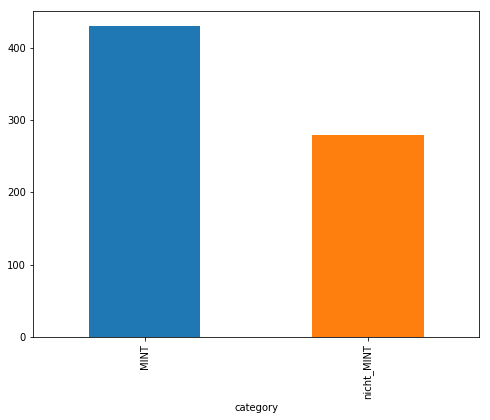

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
poll_df.groupby("category")["category"].count().plot.bar(ylim=0);
poll_df.groupby("category")["category"].count()

In [35]:
poll_df["category_id"] = poll_df["category"].factorize()[0]
#Mit Studiengang
#category_id_df = poll_df[["category", "category_id"]].drop_duplicates().sort_values("category_id")
category_id_df

,category,category_id
0,nicht_MINT,0
1,MINT,1


Aufteilung in 80% Trainings- und 20% Testdaten.

In [54]:
from sklearn.model_selection import train_test_split

#Mit Studiengang
#features = poll_df['Eigenschaften']
#labels = poll_df["category_id"]

#Ohne Studiengang
features = no_subject_df['kein_Studiengang']
labels = no_subject_df["category_id"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(567,)
(142,)
(567,)
(142,)


### Trainieren des Naive Bayes Modells (NB)

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([("vect", CountVectorizer(ngram_range=(1, 1), stop_words=None)),
                     ("tfidf", TfidfTransformer(sublinear_tf=True, norm="l2")),
                     ("nb_clf", MultinomialNB()),])
text_clf = text_clf.fit(X_train, y_train)

In [56]:
%time text_clf.fit(X_train, y_train)

Wall time: 37.9 ms


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ear_tf=True, use_idf=True)), ('nb_clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [57]:
y_predicted = text_clf.predict(X_test)

### Ergebnisbewertung NB

Berechnung Accuracy-Score

In [58]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_predicted)

0.5985915492957746

Berechnung Classification Report

In [59]:
print(metrics.classification_report(y_test, y_predicted, 
                                    labels=category_id_df.category_id.values, 
                                    target_names=category_id_df.category.values))

              precision    recall  f1-score   support

  nicht_MINT       1.00      0.03      0.07        59
        MINT       0.59      1.00      0.74        83

   micro avg       0.60      0.60      0.60       142
   macro avg       0.80      0.52      0.40       142
weighted avg       0.76      0.60      0.46       142



Confusion Matrix

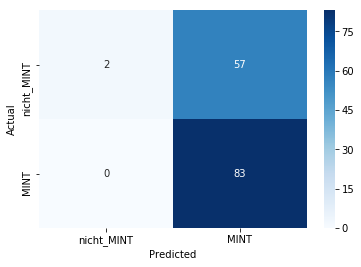

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel("Actual")
plt.xlabel("Predicted");

### Trainieren eines Support Vector Modells (SVM)

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC

text_clf = Pipeline([("vect", CountVectorizer(ngram_range=(1, 1), stop_words=None)),
                     ("tfidf", TfidfTransformer(sublinear_tf=True, norm="l2")),
                     ("sv_clf", SVC(kernel="linear"))])

text_clf = text_clf.fit(X_train, y_train)

In [62]:
y_predicted = text_clf.predict(X_test)

### Ergebnisbewertung SVM

Berechnung Acuracy-Score

In [63]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_predicted)

0.704225352112676

Confusion-Matrix

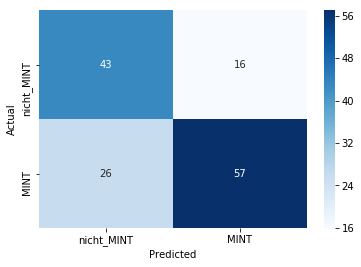

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel("Actual")
plt.xlabel("Predicted");

Berechnung Classification Report

In [64]:
print(metrics.classification_report(y_test, y_predicted, target_names=category_id_df.category.values))

              precision    recall  f1-score   support

  nicht_MINT       0.62      0.73      0.67        59
        MINT       0.78      0.69      0.73        83

   micro avg       0.70      0.70      0.70       142
   macro avg       0.70      0.71      0.70       142
weighted avg       0.72      0.70      0.71       142



Bewertung Precision:
- Sicherer beim Erkennen, wenn die Betrachteten Datensätze nicht zur MINT-Kategorie gehören
- Der nicht_MINT-Kategorie werden öfter Datensätze zugeordnet, die dort falsch sind

Bewertung Recall:
- nicht_MINT Datensätze werden öfters als solche erkannt
- MINT Datensätze werden nur unwesentlich schlechter als solche erkannt

### Optimierung der Parameter

Mit den folgenden Schritten wird nun versucht, die Parametrisierung der Pipeline zu optimieren:

1. Aufbau der Pipeline
2. Vorgabe möglicher Parameterwerte
3. Optimierung
4. Ausgabe des besten Parametersets

In [72]:
import numpy as np 
from pprint import pprint
from time import time 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ("vect", CountVectorizer(stop_words=None)),
    ("tfidf", TfidfTransformer()),
    ("sv_clf", SVC()),
])

In [76]:
parameters = {
    "vect__max_df": (0.2, 0.5, 0.75, 1.0), # Ignorieren von Termen mit relativer Document Frequency > max_df (filtert Korpusspezifische Stoppwörter)
    "vect__ngram_range": ((1, 1), (1, 2)),  # Unigramme oder Bigramme
    "tfidf__use_idf": (True, False), # Verwendung der Inverse Document Frequency
    "tfidf__norm": ("l1", "l2"), # Art der Normalisierung
    "sv_clf__C": (1., 1.1, 1.2, 1.3, 1.4, 1.5, 1.6), # Penalty Parameter des Fehlerterms (Default = 1.0)
    "sv_clf__kernel": ("rbf", "linear"), # Art der Entscheidungsfunktion (rbf=Radial Basis Function)
}

In [77]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Pipeline:", [name for name, _ in pipeline.steps])
print("Übergebene Parameter:")
pprint(parameters)
t0 = time()
grid_search.fit(X_train, y_train)
print("Fertig nach %0.3fs" % (time() - t0))

Pipeline: ['vect', 'tfidf', 'sv_clf']
Übergebene Parameter:
{'sv_clf__C': (1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6),
 'sv_clf__kernel': ('rbf', 'linear'),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.2, 0.5, 0.75, 1.0),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 3 folds for each of 448 candidates, totalling 1344 fits


C:\Users\ewittmann\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   27.1s


Fertig nach 50.706s


[Parallel(n_jobs=-1)]: Done 1344 out of 1344 | elapsed:   50.5s finished


In [78]:
print("Bester Score (hier Accuracy): %0.3f" % grid_search.best_score_)
print("Bestes Parameter Set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Bester Score (hier Accuracy): 0.690
Bestes Parameter Set:
	sv_clf__C: 1.2
	sv_clf__kernel: 'linear'
	tfidf__norm: 'l2'
	tfidf__use_idf: False
	vect__max_df: 0.5
	vect__ngram_range: (1, 1)


Anwenden der optimierten Parameter

In [99]:
#Mit Studiengang
#X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, 
#                                                                                 labels, 
#                                                                                 poll_df.index, 
#                                                                                 test_size=0.20)

#Ohne Studiengang
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, 
                                                                                 labels, 
                                                                                 no_subject_df.index, 
                                                                                 test_size=0.20)

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC

text_clf = Pipeline([("vect", CountVectorizer(max_df=0.5, ngram_range=(1, 1), stop_words=None)),
                     ("tfidf", TfidfTransformer(use_idf=False, sublinear_tf=True, norm="l2")),
                     ("sv_clf", SVC(C=1.2, kernel="linear")),])

text_clf = text_clf.fit(X_train, y_train)
y_predicted = text_clf.predict(X_test)

In [101]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_predicted)

print(metrics.classification_report(y_test, y_predicted, 
                                    labels=category_id_df.category_id.values, 
                                    target_names=category_id_df.category.values))

              precision    recall  f1-score   support

  nicht_MINT       0.58      0.50      0.54        52
        MINT       0.73      0.79      0.76        90

   micro avg       0.68      0.68      0.68       142
   macro avg       0.65      0.64      0.65       142
weighted avg       0.68      0.68      0.68       142



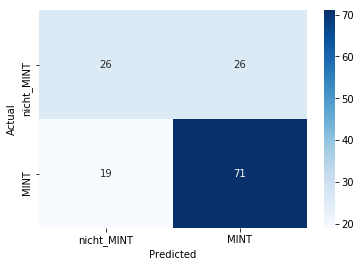

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel("Actual")
plt.xlabel("Predicted");

Die Optimierung der Parameter führt zu einer Verbesserung der Ergebnisse für die MINT-Kategorie. Im Gegensatz dazu verschlechtern sich die Werte für die nicht_MINT-Kategorie.

### Untersuchung falsch kategorisierter Daten

In [93]:
X_test.index
test_df = no_subject_df.ix[X_test.index]
test_df.sample(10)

C:\Users\ewittmann\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,category,kein_Studiengang,category_id
598,nicht_MINT,"Weiblich, fachgebundene Hochschulreife, in D...",0
469,MINT,"Weiblich, allgemeine Hochschulreife, in Deut...",1
198,nicht_MINT,"Weiblich, allgemeine Hochschulreife, in Deut...",0
691,MINT,"Männlich, fachhochschulreife, Eltern im Ausl...",1
500,nicht_MINT,"Weiblich, allgemeine Hochschulreife, in Deut...",0
277,nicht_MINT,"Männlich, fachgebundene Hochschulreife, in D...",0
642,nicht_MINT,"Männlich, fachgebundene Hochschulreife, Elte...",0
120,MINT,"Weiblich, fachgebundene Hochschulreife, Elte...",1
446,nicht_MINT,"Männlich, allgemeine Hochschulreife, in Deut...",0
559,nicht_MINT,"Weiblich, allgemeine Hochschulreife, in Deut...",0


In [94]:
id_to_category = dict(category_id_df[['category_id', 'category']].values)
id_to_category

test_df['predicted_id'] = y_predicted
test_df['predicted'] = test_df['predicted_id'].map(lambda id: id_to_category[id])

In [98]:
# Spaltenbreite kann ggf. damit verbreitert werden, damit mehr Text sichtbar wird
pd.set_option('max_colwidth', 600)

test_df[['category', 'predicted', 'kein_Studiengang']][(test_df.category_id != test_df.predicted_id)]

,category,predicted,kein_Studiengang
120,MINT,nicht_MINT,"Weiblich, fachgebundene Hochschulreife, Eltern im Ausland geboren, Studienpionier, kein MINT-Beruf, Beliebtheit Mathematik: 4, Beliebtheit Physik: 3, Beliebtheit Informatik: 2, Beliebtheit Chemie: 3, Beliebtheit Biologie: 4, Fachinteresse: 3, Berufsaussichten: 3, Gehalt: 3, Gesellschaftliches Ansehen: 4, Partner: 4, Kinder: 1, Karriere: 2"
695,nicht_MINT,MINT,"Männlich, allgemeine Hochschulreife, in Deutschland geboren, Studienpionier, kein MINT-Beruf, Beliebtheit Mathematik: 3, Beliebtheit Physik: 1, Beliebtheit Informatik: 3, Beliebtheit Chemie: 4, Beliebtheit Biologie: 5, Fachinteresse: 4, Berufsaussichten: 4, Gehalt: 2, Gesellschaftliches Ansehen: 2, Partner: 4, Kinder: 1, Karriere: 2"
298,nicht_MINT,MINT,"Weiblich, allgemeine Hochschulreife, in Deutschland geboren, Studienpionier, Elternteil übt MINT-Beruf aus, Beliebtheit Mathematik: 1, Beliebtheit Physik: 1, Beliebtheit Informatik: 2, Beliebtheit Chemie: 2, Beliebtheit Biologie: 4, Fachinteresse: 4, Berufsaussichten: 3, Gehalt: 1, Gesellschaftliches Ansehen: 1, Partner: 3, Kinder: 3, Karriere: 3"
284,nicht_MINT,MINT,"Weiblich, allgemeine Hochschulreife, in Deutschland geboren, Elternteil hat MINT-Fach studiert, Elternteil übt MINT-Beruf aus, Beliebtheit Mathematik: 2, Beliebtheit Physik: 1, Beliebtheit Informatik: 2, Beliebtheit Chemie: 3, Beliebtheit Biologie: 4, Fachinteresse: 3, Berufsaussichten: 2, Gehalt: 1, Gesellschaftliches Ansehen: 2, Partner: 2, Kinder: 2, Karriere: 2"
305,MINT,nicht_MINT,"Weiblich, allgemeine Hochschulreife, in Deutschland geboren, Elternteil hat studiert, kein MINT-Beruf, Beliebtheit Mathematik: 2, Beliebtheit Physik: 4, Beliebtheit Informatik: 3, Beliebtheit Chemie: 4, Beliebtheit Biologie: 5, Fachinteresse: 4, Berufsaussichten: 3, Gehalt: 2, Gesellschaftliches Ansehen: 3, Partner: 4, Kinder: 3, Karriere: 4"
471,nicht_MINT,MINT,"Weiblich, allgemeine Hochschulreife, in Deutschland geboren, Elternteil hat MINT-Fach studiert, Elternteil übt MINT-Beruf aus, Geschwister üben MINT-Beruf aus, Beliebtheit Mathematik: 4, Beliebtheit Physik: 2, Beliebtheit Informatik: 2, Beliebtheit Chemie: 4, Beliebtheit Biologie: 4, Fachinteresse: 4, Berufsaussichten: 3, Gehalt: 3, Gesellschaftliches Ansehen: 3, Partner: 4, Kinder: 4, Karriere: 3"
229,nicht_MINT,MINT,"Weiblich, Abitur, im Ausland geboren, Eltern im Ausland geboren, Studienpionier, Elternteil übt MINT-Beruf aus, Beliebtheit Mathematik: 5, Beliebtheit Physik: 4, Beliebtheit Informatik: 4, Beliebtheit Chemie: 3, Beliebtheit Biologie: 5, Fachinteresse: 3, Berufsaussichten: 4, Gehalt: 4, Gesellschaftliches Ansehen: 2, Partner: 3, Kinder: 4, Karriere: 4"
348,nicht_MINT,MINT,"Männlich, allgemeine Hochschulreife, in Deutschland geboren, Elternteil hat MINT-Fach studiert, Elternteil hat studiert, Elternteil übt MINT-Beruf aus, Beliebtheit Mathematik: 2, Beliebtheit Physik: 2, Beliebtheit Informatik: 2, Beliebtheit Chemie: 2, Beliebtheit Biologie: 2, Fachinteresse: 4, Berufsaussichten: 3, Gehalt: 2, Gesellschaftliches Ansehen: 2, Partner: 4, Kinder: 3, Karriere: 4"
86,MINT,nicht_MINT,"Weiblich, allgemeine Hochschulreife, Eltern im Ausland geboren, Studienpionier, kein MINT-Beruf, Beliebtheit Mathematik: 4, Beliebtheit Physik: 5, Beliebtheit Informatik: 3, Beliebtheit Chemie: 2, Beliebtheit Biologie: 4, Fachinteresse: 3, Berufsaussichten: 4, Gehalt: 3, Gesellschaftliches Ansehen: 2, Partner: 4, Kinder: 3, Karriere: 4"
694,nicht_MINT,MINT,"Männlich, allgemeine Hochschulreife, in Deutschland geboren, Elternteil hat MINT-Fach studiert, Elternteil übt MINT-Beruf aus, Beliebtheit Mathematik: 2, Beliebtheit Physik: 2, Beliebtheit Informatik: 1, Beliebtheit Chemie: 2, Beliebtheit Biologie: 4, Fachinteresse: 4, Berufsaussichten: 3, Gehalt: 3, Gesellschaftliches Ansehen: 2, Partner: 4, Kinder: 4, Karriere: 3"


### Fazit

Mit Angabe des Studiengangs:
- Beide Modelle liefern sehr gute Ergebnisse
- Das Support Vector Modell ist jedoch nochmal um einiges genauer
- NB Acuracy von ca 88%
- SVM Acuracy von ca 93%

Ohne Angabe des Studiengangs:
- NB liefert nur ca 60% Acuracy
- SVM Acuracy von ca 70%

-> Deutlich schlechtere Ergebnisse als mit Studiengang

Bei Betrachtung der Vorhersagen anhand der Eigenschaften fällt auf, dass trotz typischer MINT-Merkmalen es sich nicht immer um ein MINT-Fach handelt. Eine Person bei der die MINT-Fächer in der Schule beliebt waren und mit Eltern, die ein MINT-Fach studiert haben und einen MINT-Beruf ausüben, kann trotz diese Voraussetzungen einen nicht MINT-Studiengang gewählt haben.

Dies zeigt, dass sich die Studenten anhand ihrer Eigenschaften nicht gut klassifizieren lassen. Gerade wenn man die sehr guten Ergebnisse nimmt, die durch die Angabe des Studiengangs entstanden. Der Algorithmus kann lernen welcher Studiengang ein MINT-Fach ist, jedoch nur bedingt ob eine Person mit bestimmten Eigenschaften und Umfeld ein MINT-Student ist.

## Kategorie unterrepräsentierte Gruppen

In diesem Kapitel sollen die Personendaten in mehrere Kategorien unterteilt und klassifiziert werden. Dazu gehören Frauen, beruflich qualifizierte und Migranten bzw. Menschen mit ausländischen Wurzeln. Dabei fließen folgende weitere Informationen mit ein:

- (Studiengang)
- Ist der Studiengang ein MINT-Fach?
- Haben Eltern / Geschwister bereits studiert, falls ja war es ein MINT-Fach?
- Arbeiten Eltern / Geschwister in einem MINT-Beruf?
- Beliebtheit bestimmter MINT Fächer in der Schule
- Priorität folgender Faktoren bei der Wahl des Studiengangs:
    - Fachinteresse
    - Berufsaussichten
    - Gehalt
    - Familiäre Gründe
- Priorität folgender Faktoren für die berufliche Zukunft:
    - Partner
    - Kinder
    - Karriere

### Datenaufbereitung

Daten mit get_multilabel_data aus DB laden. Für spätere Klassifikation wird noch die Spalte Kategorie zum Dataframe hinzugefügt.

In [9]:
import sqlite3
import pandas as pd
import os.path
dbPath = "database/bachelor_umfrage.db"

def get_multilabel_data(table_name="klassifikation", where=None):
    df = pd.DataFrame()
    if os.path.isfile(dbPath):
        conn = sqlite3.connect(dbPath)
        sql = """SELECT Geschlecht, Qualifikation, GeborenAusland, ElternAusland, GeborenDeutschland,
                MultilabelEigenschaften FROM """ + table_name
        if where:
            sql += " WHERE " + where
        df = pd.read_sql_query(sql, conn)
    else:
        print("Datenbank oder Tabelle konnte nicht gefunden werden.")
    return df

#def label_mint (row):
#    if row['MINTFach'] == "ja" :
#        return 'MINT'
#    elif row['MINTFach'] == "nein" :
#        return 'nicht_MINT'

multilabel_df = get_multilabel_data(table_name="klassifikation")
multilabel_df['category'] = multilabel_df.apply(label_mint, axis=1)
multilabel_df = multilabel_df.drop(columns=['MINTFach'])
multilabel_df.sample(5)

,Eigenschaften,category
559,"Weiblich, Soziale Arbeit, allgemeine Hochschul...",nicht_MINT
51,"Männlich, Energieprozesstechnik, allgemeine Ho...",MINT
484,"Weiblich, Bauingenieurwesen, allgemeine Hochsc...",MINT
128,"Weiblich, Bauingenieurwesen, fachgebundene Hoc...",MINT
541,"Männlich, Angewandte Chemie, allgemeine Hochsc...",MINT


Verteilung MINT- und nicht MINT-Studenten: ca 2/3 MINT -> evtl. später ein Problem

category
MINT          430
nicht_MINT    279
Name: category, dtype: int64

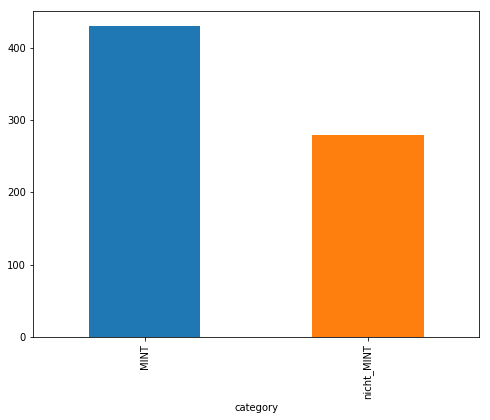

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
multilabel_df.groupby("category")["category"].count().plot.bar(ylim=0);
multilabel_df.groupby("category")["category"].count()

In [11]:
multilabel_df["category_id"] = multilabel_df["category"].factorize()[0]
category_id_df = poll_df[["category", "category_id"]].drop_duplicates().sort_values("category_id")
category_id_df

,category,category_id
0,nicht_MINT,0
1,MINT,1


Aufteilung in 80% Trainings- und 20% Testdaten.

In [12]:
from sklearn.model_selection import train_test_split

features = multilabel_df['MultilabelEigenschaften']
labels = multilabel_df["category_id"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(567,)
(142,)
(567,)
(142,)


### Trainieren des Naive Bayes Modells (NB)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([("vect", CountVectorizer(ngram_range=(1, 1), stop_words=None)),
                     ("tfidf", TfidfTransformer(sublinear_tf=True, norm="l2")),
                     ("nb_clf", MultinomialNB()),])
text_clf = text_clf.fit(X_train, y_train)

In [14]:
%time text_clf.fit(X_train, y_train)

Wall time: 37.5 ms


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ear_tf=True, use_idf=True)), ('nb_clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [22]:
y_predicted = text_clf.predict(X_test)

### Ergebnisbewertung NB

Berechnung Accuracy-Score

In [16]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_predicted)

0.8802816901408451

Confusion Matrix

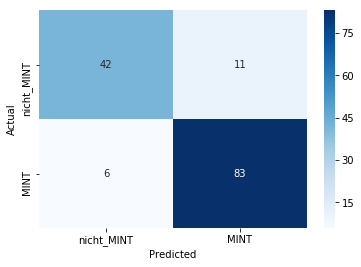

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel("Actual")
plt.xlabel("Predicted");

Berechnung Classification Report

In [17]:
print(metrics.classification_report(y_test, y_predicted, 
                                    labels=category_id_df.category_id.values, 
                                    target_names=category_id_df.category.values))

              precision    recall  f1-score   support

  nicht_MINT       0.88      0.79      0.83        53
        MINT       0.88      0.93      0.91        89

   micro avg       0.88      0.88      0.88       142
   macro avg       0.88      0.86      0.87       142
weighted avg       0.88      0.88      0.88       142



### Trainieren eines Support Vector Modells (SVM)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC

text_clf = Pipeline([("vect", CountVectorizer(ngram_range=(1, 1), stop_words=None)),
                     ("tfidf", TfidfTransformer(sublinear_tf=True, norm="l2")),
                     ("sv_clf", SVC(kernel="linear"))])

text_clf = text_clf.fit(X_train, y_train)

In [21]:
y_predicted = text_clf.predict(X_test)

### Ergebnisbewertung SVM

Berechnung Acuracy-Score

In [23]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_predicted)

0.9366197183098591

Berechnung Classification Report

In [24]:
print(metrics.classification_report(y_test, y_predicted, target_names=category_id_df.category.values))

              precision    recall  f1-score   support

  nicht_MINT       0.88      0.96      0.92        53
        MINT       0.98      0.92      0.95        89

   micro avg       0.94      0.94      0.94       142
   macro avg       0.93      0.94      0.93       142
weighted avg       0.94      0.94      0.94       142



Confusion-Matrix

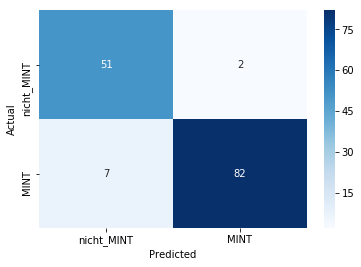

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel("Actual")
plt.xlabel("Predicted");

### Fazit

Beide Modelle liefern sehr gute Ergebnisse. 
Das Support Vector Modell ist jedoch nochmal um einiges genauer.